# EE679 - Speech Processing
## Assignment 1B
## Keshav Singhal 20D070047

In [113]:
#importing useful libraries

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,14)
import numpy as np
import timeit
from scipy.signal import impulse
from scipy.io.wavfile import read

## Use your previous synthesized vowel /u/ at two distinct pitches (F0 = 120 Hz, F0 = 220 Hz). Keep the bandwidths constant at 100 Hz for all formants.
## Vowel F1, F2, F3
## /u/ 300, 870, 2240
## We would like to use the DFT computed with various window lengths and shapes to estimate the vowel’s F0 and formant frequencies and study the obtained accuracies with reference to our ‘ground truth’ values. For the analysis, use a single waveform segment near the centre of your synthesized vowel.

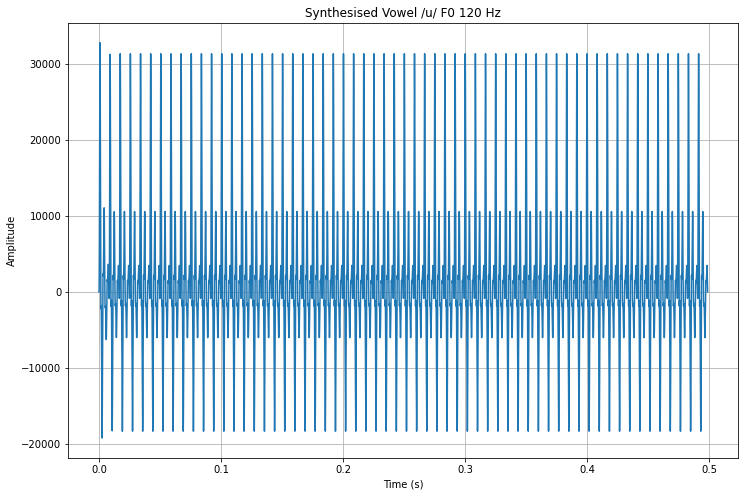

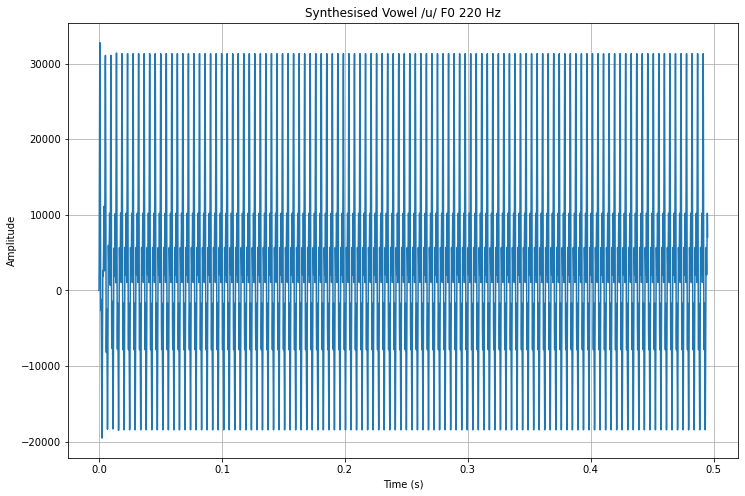

In [115]:
#Reading the audio files
Fs, vowel_u_F0_120 = wavfile.read("u_120.wav")
Fs, vowel_u_F0_220 = wavfile.read("u_220.wav")

vowel_u_F0_120 = vowel_u_F0_120.astype(float)
vowel_u_F0_220 = vowel_u_F0_220.astype(float)

time_axis = np.arange(len(vowel_u_F0_120)) / Fs
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(time_axis, vowel_u_F0_120)
plt.title("Synthesised Vowel /u/ F0 120 Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

time_axis = np.arange(len(vowel_u_F0_220)) / Fs
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(time_axis, vowel_u_F0_220)
plt.title("Synthesised Vowel /u/ F0 220 Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

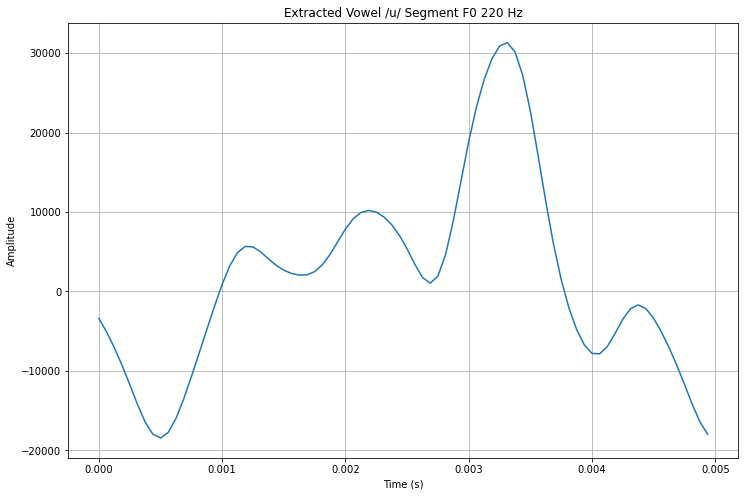

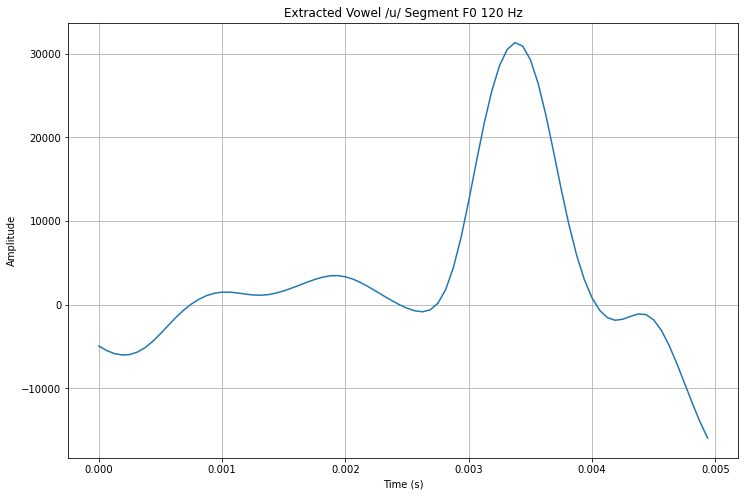

PortAudioError: Error opening OutputStream: Internal PortAudio error [PaErrorCode -9986]

In [121]:
# Extract a waveform segment near the center of the vowel sound
segment_duration = 0.005  # 5 ms segment
segment_length = int(segment_duration * Fs)
center_index = len(vowel_u_F0_220) // 2
segment_start = center_index - segment_length // 2
segment_end = segment_start + segment_length
segment_u_F0_220 = vowel_u_F0_220[segment_start:segment_end]

# Plot the extracted waveform segment
time_axis = np.arange(len(segment_u_F0_220)) / Fs
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(time_axis, segment_u_F0_220)
plt.title("Extracted Vowel /u/ Segment F0 220 Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()



# Extract a waveform segment near the center of the vowel sound
segment_duration = 0.005 # 5 ms segment
segment_length = int(segment_duration * Fs)
center_index = len(vowel_u_F0_120) // 2
segment_start = center_index - segment_length // 2
segment_end = segment_start + segment_length
segment_u_F0_120 = vowel_u_F0_120[segment_start:segment_end]

# Plot the extracted waveform segment
time_axis = np.arange(len(segment_u_F0_120)) / Fs
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(time_axis, segment_u_F0_120)
plt.title("Extracted Vowel /u/ Segment F0 120 Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Play the extracted vowel /u/ segment
# Play the extracted vowel /u/ segment
sd.play(segment_u_F0_220, Fs)
sd.play(segment_u_F0_120, Fs)
sd.wait()

## Plot the magnitude (dB) spectrum with rectangular and Hamming windows of lengths: 5 ms, 10 ms, 20 ms, 40 ms, each with a large zero-padded DFT.

##  (i) Comment on the similarities and differences between the different computed spectra.

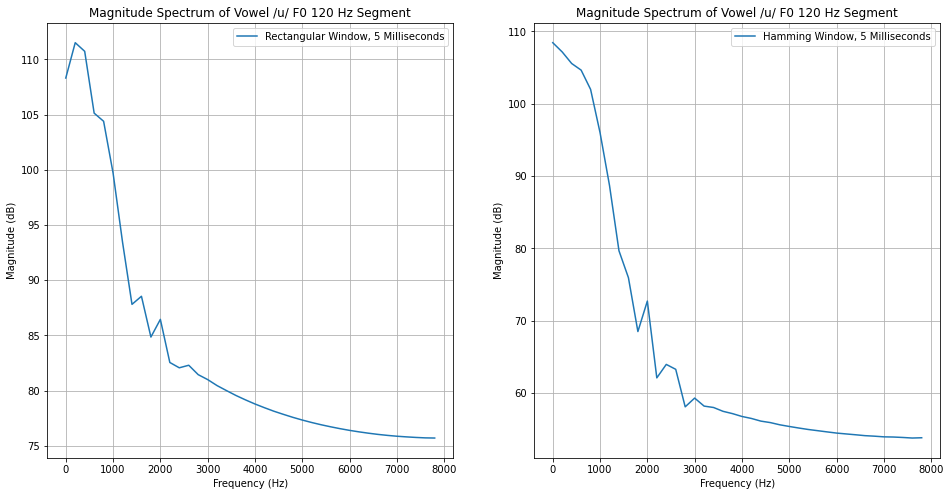

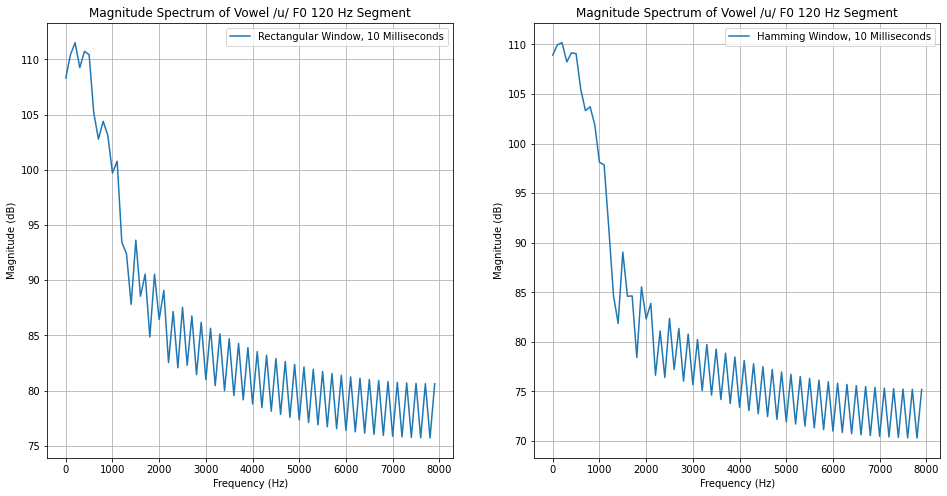

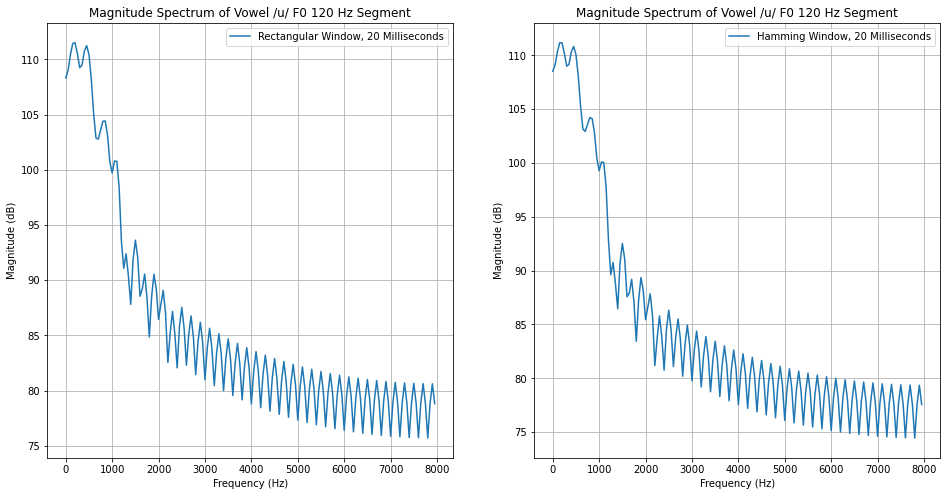

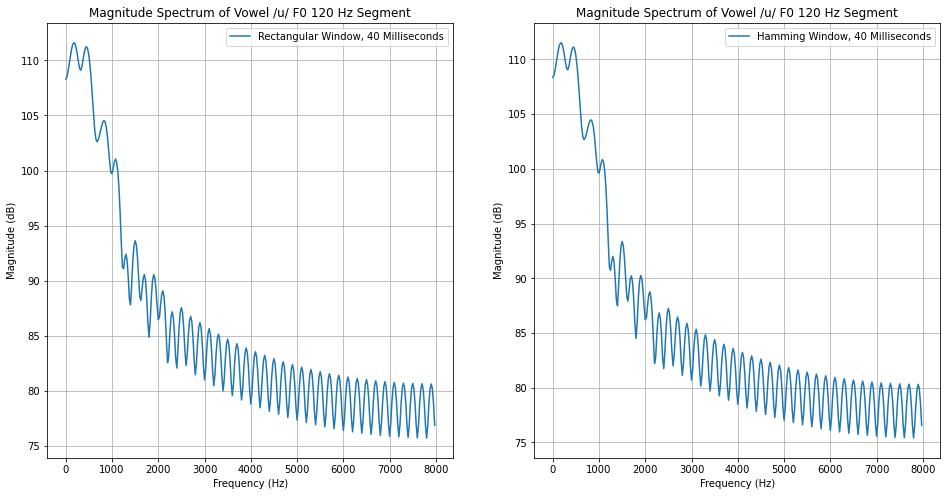

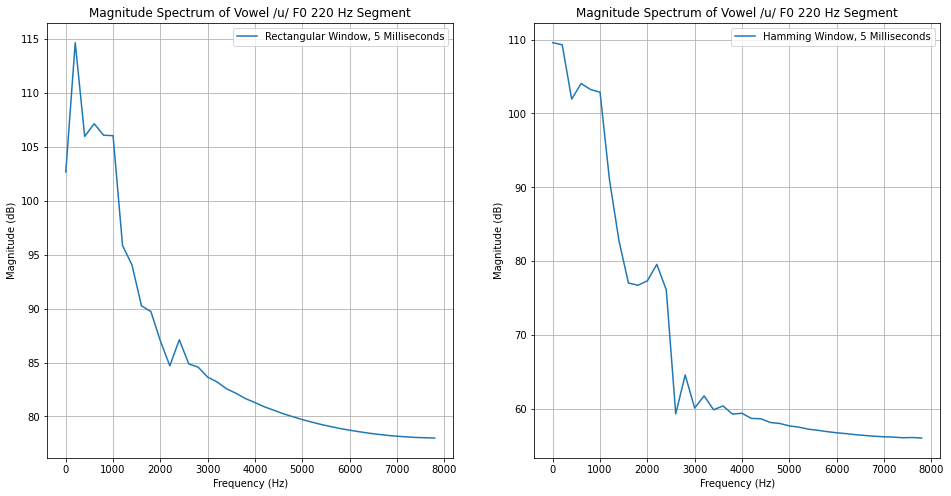

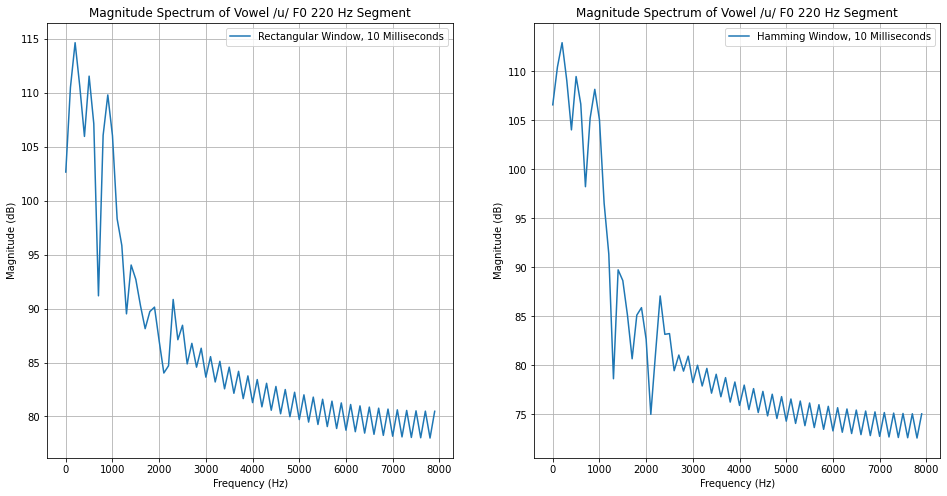

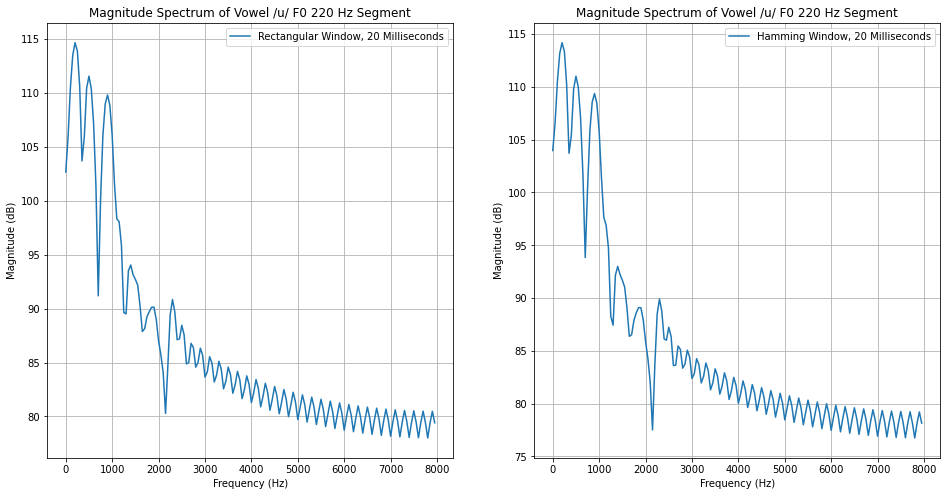

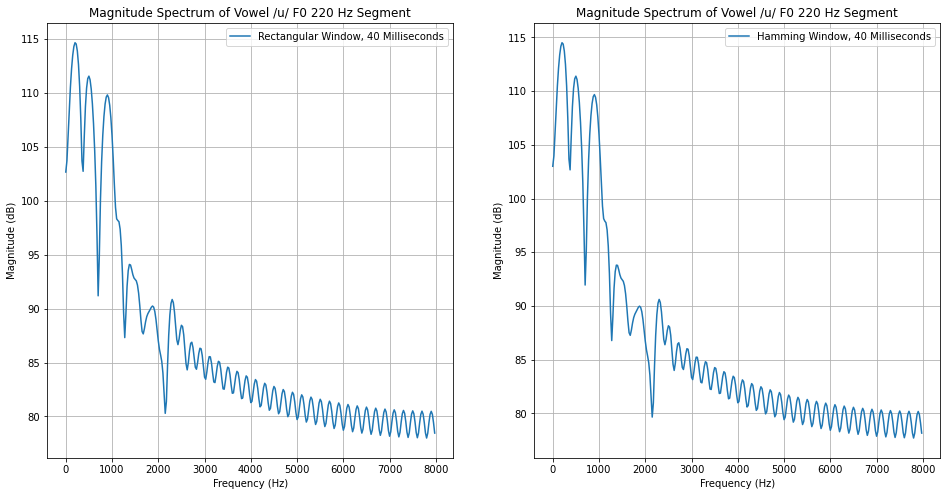

<Figure size 1152x576 with 0 Axes>

In [122]:
# Function to compute the DFT magnitude spectrum for a given signal and window length
def compute_dft_magnitude(signal, window_length, window_type):
    # Apply the specified window function
    if window_type == 'rectangular':
        window = np.ones(window_length)
    elif window_type == 'hamming':
        window = np.hamming(window_length)
    else:
        raise ValueError("Invalid window type")

    # Compute the DFT with zero-padding
    N = len(signal)
    padded_signal = np.pad(signal, ((window_length - N)//2, window_length - N - (window_length - N)//2), 'constant')
    windowed_signal = padded_signal*window
    spectrum = np.abs(np.fft.fft(windowed_signal))[:window_length // 2]

    # Convert to dB scale
    spectrum_dB = 20 * np.log10(spectrum)

    return spectrum_dB

# Window lengths in seconds
window_lengths_ms = [5, 10, 20, 40]  # in milliseconds


# Iterate over window lengths and window types (rectangular and Hamming)
for window_length_ms in window_lengths_ms:
    window_length = int((window_length_ms / 1000) * Fs)  # in samples
    
    
    # Compute the DFT magnitude spectrum
    window_type = 'rectangular'
    spectrum_dB = compute_dft_magnitude(segment_u_F0_120, window_length, window_type)

    # Frequency axis (half of the DFT length)
    freq_axis = np.arange(window_length // 2) * (Fs / window_length)

    # Plot the magnitude spectrum
    plt.rcParams["figure.figsize"] = (16,8)
    plt.subplot(1,2,1)
    plt.plot(freq_axis, spectrum_dB, label=f'{window_type.capitalize()} Window, {window_length_ms} Milliseconds')
    plt.title("Magnitude Spectrum of Vowel /u/ F0 120 Hz Segment")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.legend()
    
    window_type = 'hamming'
    spectrum_dB = compute_dft_magnitude(segment_u_F0_120, window_length, window_type)

    # Frequency axis (half of the DFT length)
    freq_axis = np.arange(window_length // 2) * (Fs / window_length)

    # Plot the magnitude spectrum
    plt.subplot(1,2,2)
    plt.plot(freq_axis, spectrum_dB, label=f'{window_type.capitalize()} Window, {window_length_ms} Milliseconds')
    plt.title("Magnitude Spectrum of Vowel /u/ F0 120 Hz Segment")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.legend()
    plt.show()
    plt.tight_layout()
        
# Iterate over window lengths and window types (rectangular and Hamming)
for window_length_ms in window_lengths_ms:
    window_length = int((window_length_ms / 1000) * Fs)  # in samples
    
    
    # Compute the DFT magnitude spectrum
    window_type = 'rectangular'
    spectrum_dB = compute_dft_magnitude(segment_u_F0_220, window_length, window_type)

    # Frequency axis (half of the DFT length)
    freq_axis = np.arange(window_length // 2) * (Fs / window_length)

    # Plot the magnitude spectrum
    plt.rcParams["figure.figsize"] = (16,8)
    plt.subplot(1,2,1)
    plt.plot(freq_axis, spectrum_dB, label=f'{window_type.capitalize()} Window, {window_length_ms} Milliseconds')
    plt.title("Magnitude Spectrum of Vowel /u/ F0 220 Hz Segment")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.legend()
    
    window_type = 'hamming'
    spectrum_dB = compute_dft_magnitude(segment_u_F0_220, window_length, window_type)

    # Frequency axis (half of the DFT length)
    freq_axis = np.arange(window_length // 2) * (Fs / window_length)

    # Plot the magnitude spectrum
    plt.subplot(1,2,2)
    plt.plot(freq_axis, spectrum_dB, label=f'{window_type.capitalize()} Window, {window_length_ms} Milliseconds')
    plt.title("Magnitude Spectrum of Vowel /u/ F0 220 Hz Segment")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.legend()
    plt.show()
    plt.tight_layout()


## Using a single waveform, we cannot determine the F0. Thus we will include the speech signal equal to the length of the window. 

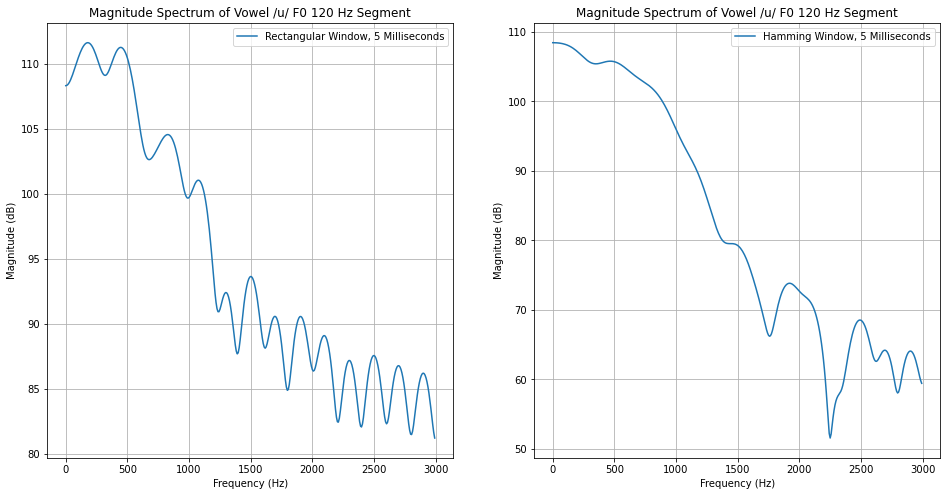

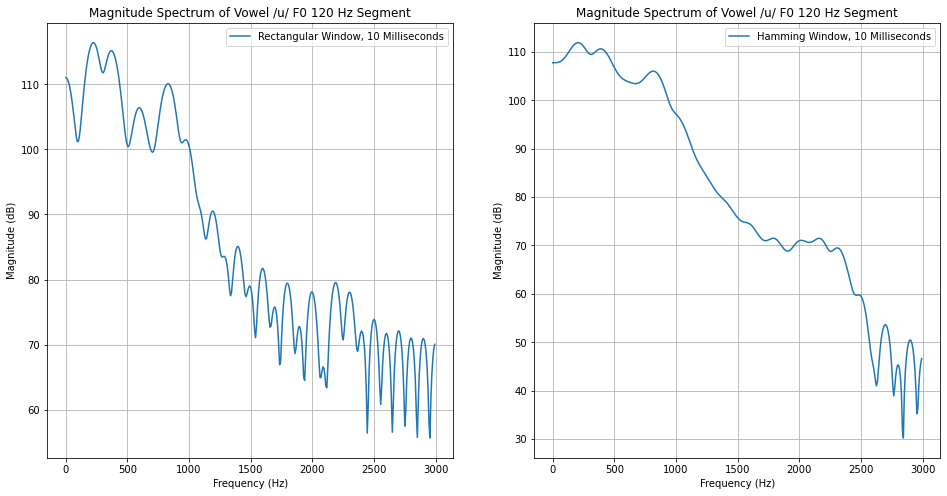

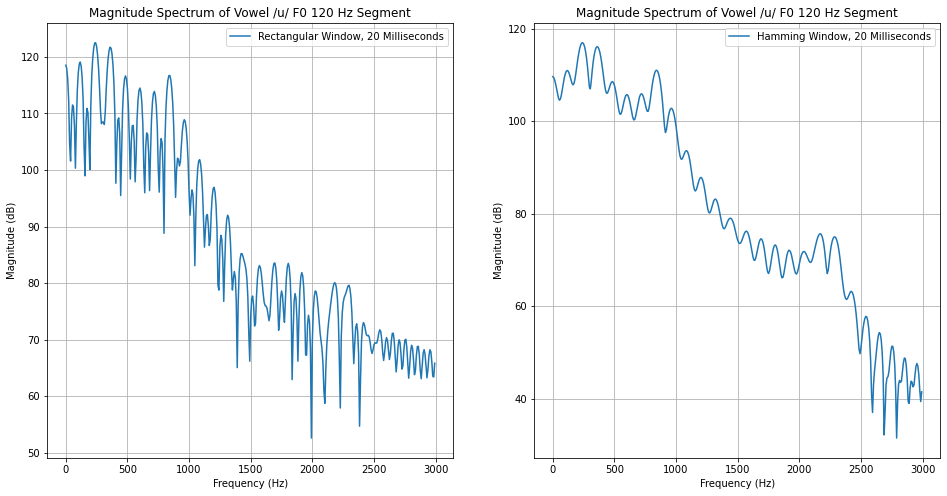

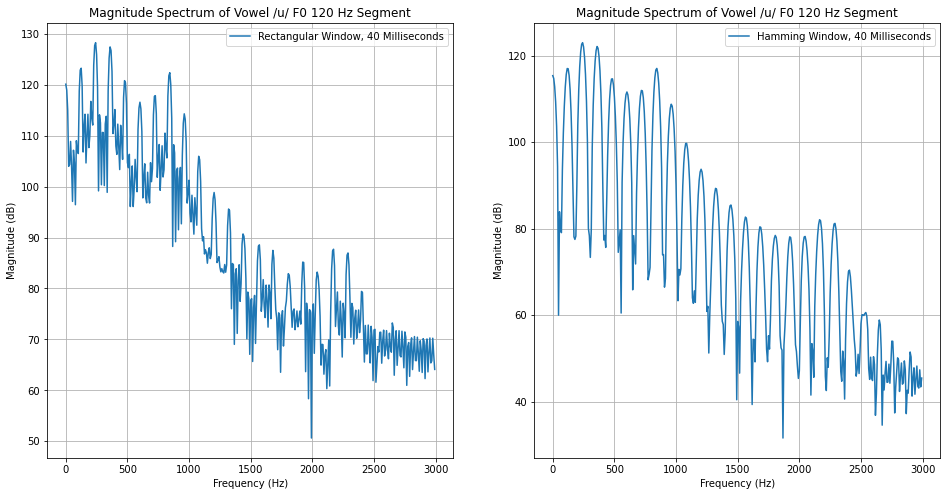

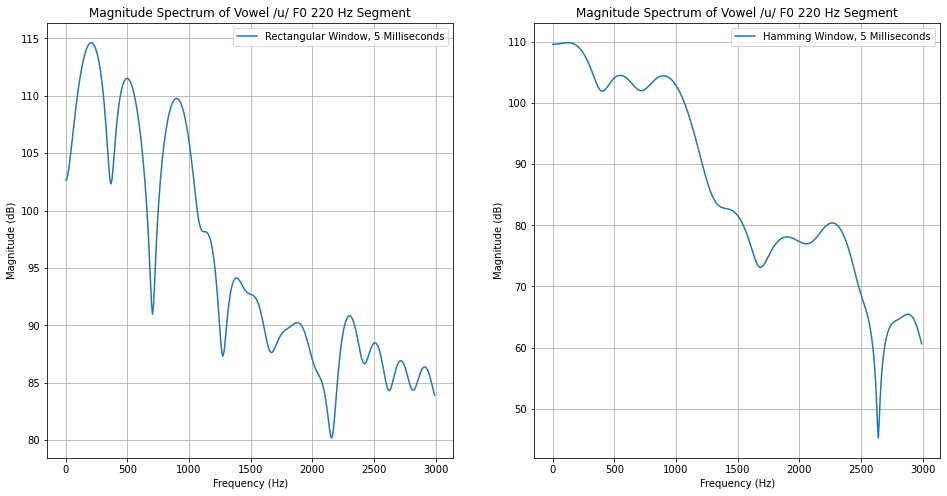

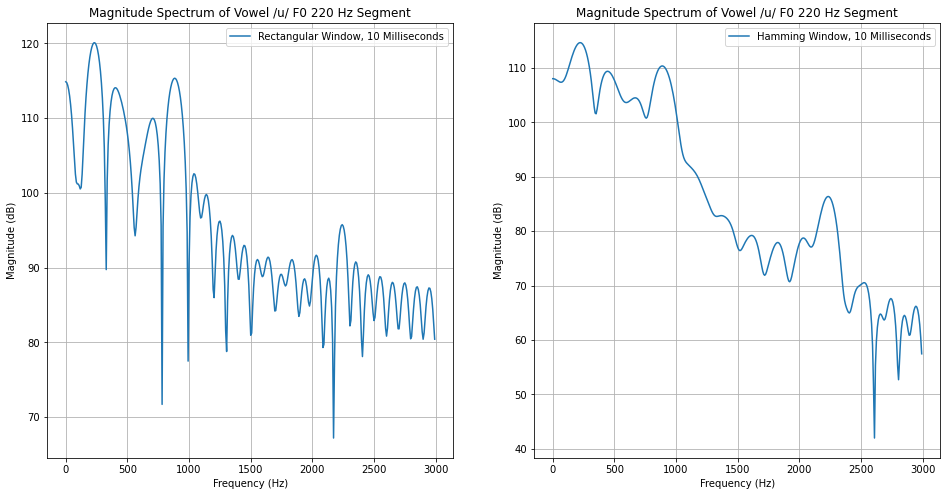

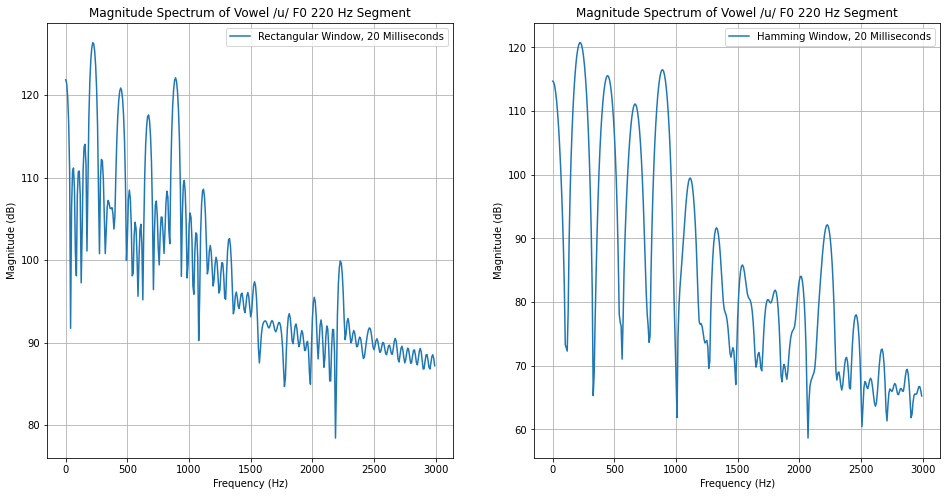

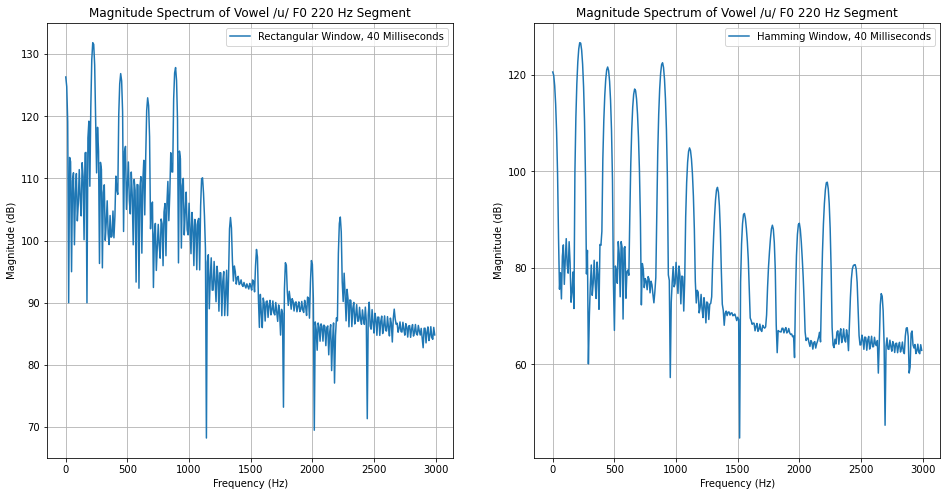

<Figure size 1152x576 with 0 Axes>

In [128]:
# Function to compute the DFT magnitude spectrum for a given signal and window length
def compute_dft_magnitude(signal, window_length, window_type):
    # Apply the specified window function
    if window_type == 'rectangular':
        window = np.ones(window_length)
    elif window_type == 'hamming':
        window = np.hamming(window_length)
    else:
        raise ValueError("Invalid window type")

    # Compute the DFT with zero-padding
    N = len(signal)
    total_samples = 2048 #2048 length DFT
    padding_size = total_samples - N
    padded_signal = np.pad(signal, (padding_size//2, padding_size - padding_size//2), 'constant') #Padding the signal
    padding_size = total_samples - window_length
    padded_window = np.pad(window, (padding_size//2, padding_size - padding_size//2), 'constant') #Padding the window
    
    windowed_signal = padded_signal*padded_window
    spectrum = np.abs(np.fft.fft(windowed_signal))[:1024]

    # Convert to dB scale
    spectrum_dB = 20 * np.log10(spectrum)

    return spectrum_dB

# Window lengths in seconds
window_lengths_ms = [5, 10, 20, 40]  # in milliseconds


# Iterate over window lengths and window types (rectangular and Hamming)
for window_length_ms in window_lengths_ms:
    window_length = int((window_length_ms / 1000) * Fs)  # in samples
    
    segment_duration = window_length_ms/1000  #  same as window length
    segment_length = int(segment_duration * Fs)
    center_index = len(vowel_u_F0_120) // 2
    segment_start = center_index - segment_length // 2
    segment_end = segment_start + segment_length
    segment_u_F0_120 = vowel_u_F0_120[segment_start:segment_end]
    
    # Compute the DFT magnitude spectrum
    window_type = 'rectangular'
    spectrum_dB = compute_dft_magnitude(segment_u_F0_120, window_length, window_type)

    # Frequency axis (half of the DFT length)
    #freq_axis = np.arange(window_length // 2) * (Fs / window_length)
    freq_axis = np.arange((1024*3000)//8000) * (8000/1024)

    # Plot the magnitude spectrum
    plt.rcParams["figure.figsize"] = (16,8)
    plt.subplot(1,2,1)
    plt.plot(freq_axis, spectrum_dB[:(1024*3000)//8000], label=f'{window_type.capitalize()} Window, {window_length_ms} Milliseconds')
    plt.title("Magnitude Spectrum of Vowel /u/ F0 120 Hz Segment")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.legend()
    
    window_type = 'hamming'
    spectrum_dB = compute_dft_magnitude(segment_u_F0_120, window_length, window_type)

    # Frequency axis (half of the DFT length)
    #freq_axis = np.arange(window_length // 2) * (Fs / window_length)
    freq_axis = np.arange((1024*3000)//8000) * (8000/1024)

    # Plot the magnitude spectrum
    plt.subplot(1,2,2)
    plt.plot(freq_axis, spectrum_dB[:(1024*3000)//8000], label=f'{window_type.capitalize()} Window, {window_length_ms} Milliseconds')
    plt.title("Magnitude Spectrum of Vowel /u/ F0 120 Hz Segment")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.legend()
    plt.show()
    plt.tight_layout()
        
# Iterate over window lengths and window types (rectangular and Hamming)
for window_length_ms in window_lengths_ms:
    window_length = int((window_length_ms / 1000) * Fs)  # in samples
    
    segment_duration = window_length_ms/1000  #  same as window length
    segment_length = int(segment_duration * Fs)
    center_index = len(vowel_u_F0_220) // 2
    segment_start = center_index - segment_length // 2
    segment_end = segment_start + segment_length
    segment_u_F0_220 = vowel_u_F0_220[segment_start:segment_end]
    
    # Compute the DFT magnitude spectrum
    window_type = 'rectangular'
    spectrum_dB = compute_dft_magnitude(segment_u_F0_220, window_length, window_type)

    # Frequency axis (half of the DFT length)
    #freq_axis = np.arange(window_length // 2) * (Fs / window_length)
    freq_axis = np.arange((1024*3000)//8000) * (8000/1024)

    # Plot the magnitude spectrum
    plt.rcParams["figure.figsize"] = (16,8)
    plt.subplot(1,2,1)
    plt.plot(freq_axis, spectrum_dB[:(1024*3000)//8000], label=f'{window_type.capitalize()} Window, {window_length_ms} Milliseconds')
    plt.title("Magnitude Spectrum of Vowel /u/ F0 220 Hz Segment")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.legend()
    
    window_type = 'hamming'
    spectrum_dB = compute_dft_magnitude(segment_u_F0_220, window_length, window_type)

    # Frequency axis (half of the DFT length)
    #freq_axis = np.arange(window_length // 2) * (Fs / window_length)
    freq_axis = np.arange((1024*3000)//8000) * (8000/1024)

    # Plot the magnitude spectrum
    plt.subplot(1,2,2)
    plt.plot(freq_axis, spectrum_dB[:(1024*3000)//8000], label=f'{window_type.capitalize()} Window, {window_length_ms} Milliseconds')
    plt.title("Magnitude Spectrum of Vowel /u/ F0 220 Hz Segment")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.legend()
    plt.show()
    plt.tight_layout()


## Spectra limited to 3000Hz

### Window Type (Rectangular vs. Hamming):

In general, both rectangular and Hamming windows exhibit similar spectral shapes for each window length.

The Hamming window results in smoother spectral peaks and lower side lobes compared to the rectangular window. This difference is more apparent in smaller window lengths. 

### Window Length (5 ms, 10 ms, 20 ms, 40 ms):

For both window types, as the window length increases, the spectral resolution improves, resulting in narrower spectral peaks.

For both window types, the spectral resolution improves with increasing window length and therefore we observe narrower peaks.

Longer window lengths provide better frequency localization, revealing finer spectral details. Shorter window lengths yield broader and less detailed spectra.

### Magnitude Level (dB):

The overall magnitude levels of the spectra decrease with increasing window length. Shorter windows tend to produce spectra with higher magnitudes.

The magnitude levels can differ significantly between the rectangular and Hamming windows, especially for longer window lengths. Hamming windows typically have lower side lobes, leading to less energy leakage and lower magnitude levels in the spectral tails.

### Frequency Resolution:

Both window types provide improved frequency resolution as the window length increases, allowing for better discrimination of closely spaced spectral components.

Hamming windows, due to their smoother shape and lower side lobes, exhibit better frequency resolution compared to rectangular windows of the same length.

### Smoothing Effect:

Longer window lengths (e.g., 20 ms and 40 ms) introduce a smoothing effect on the spectra, reducing the impact of short-duration variations.

Hamming windows introduce less spectral leakage and smoother spectral shapes compared to rectangular windows, which can be especially helpful for accurate spectral analysis.

## (ii) Estimate the signal parameters from each of the magnitude spectra and report the error with respect to the ground-truth.

## Finding the peaks of the DFT Spectrum to determine F0, F1, F2, F3

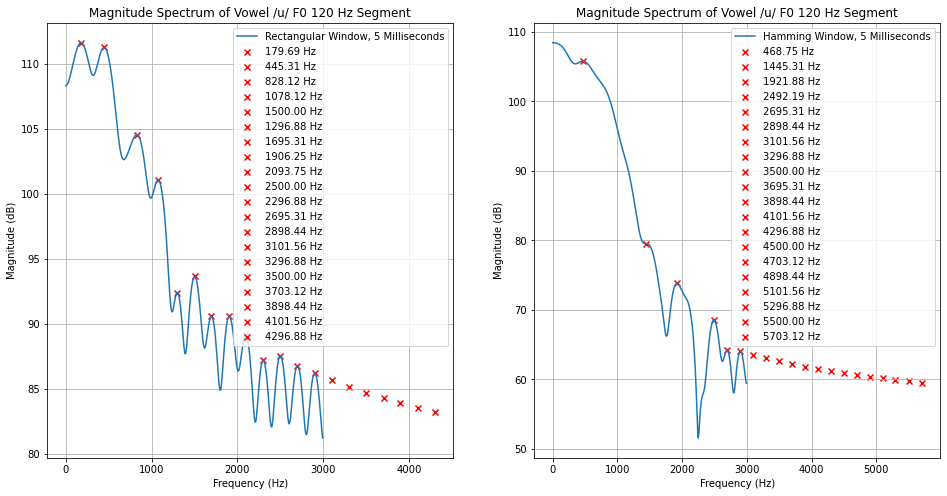

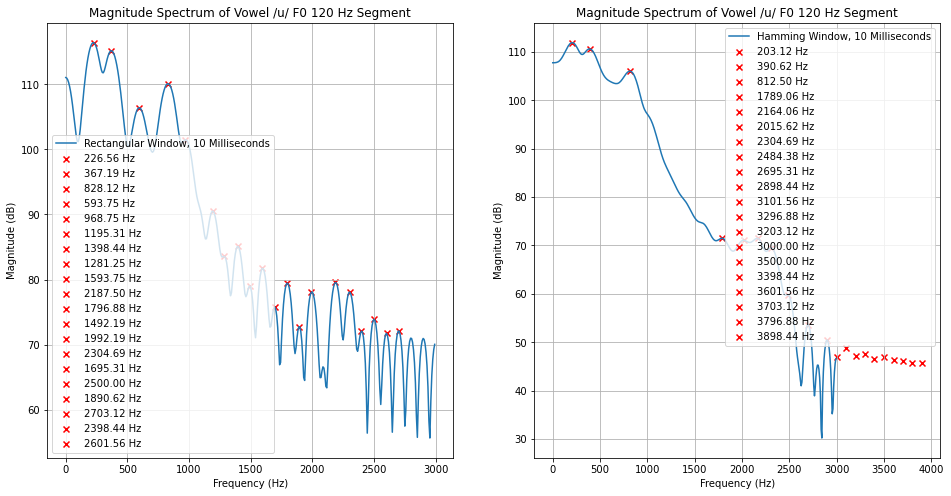

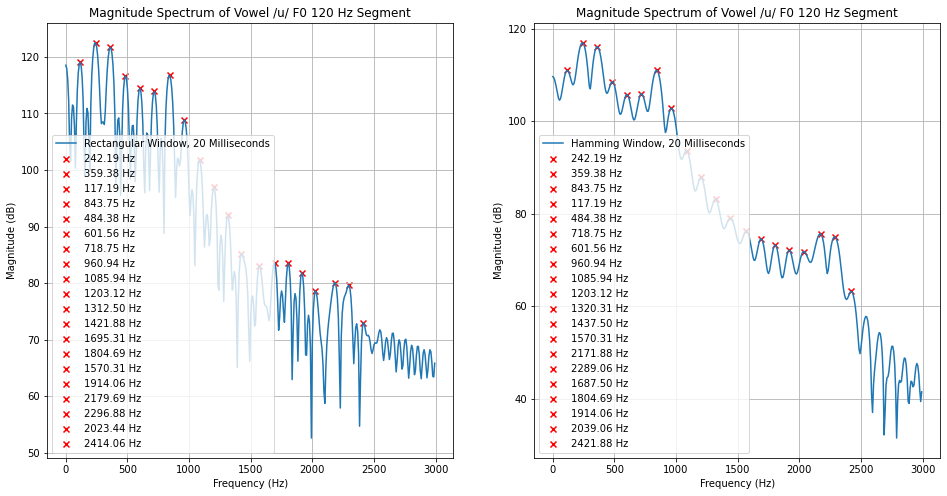

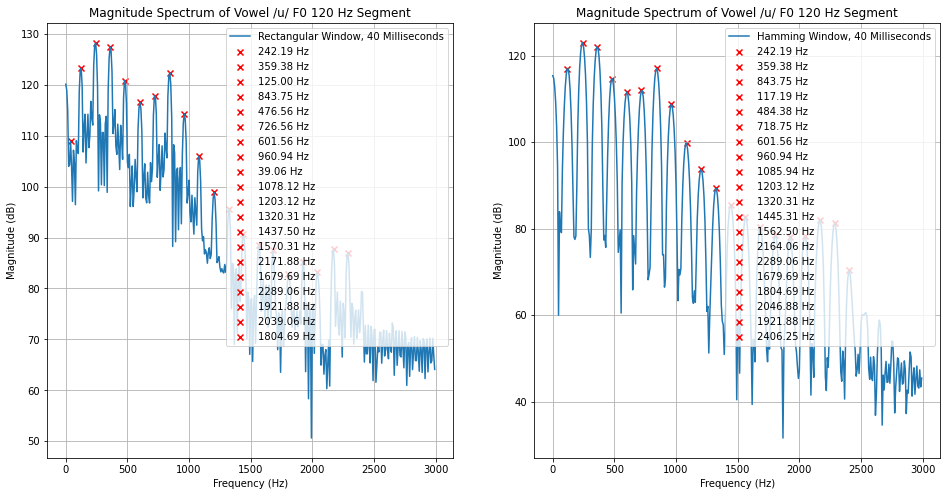

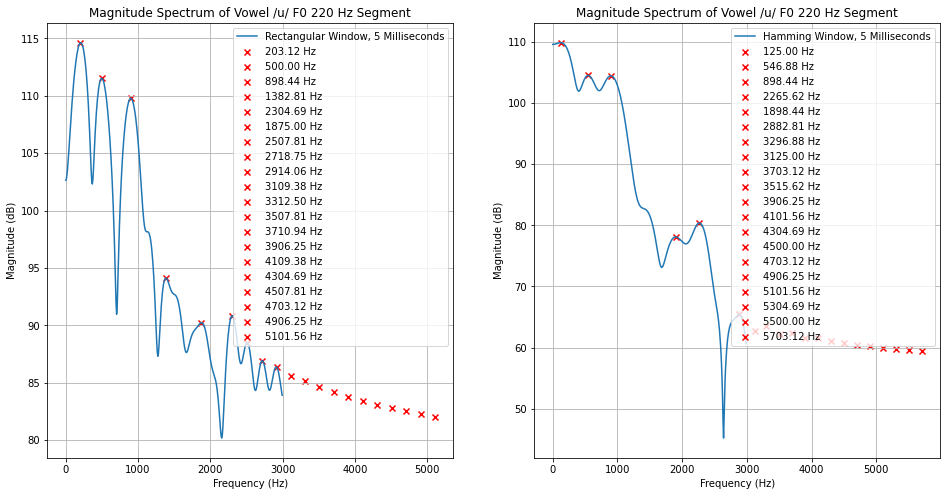

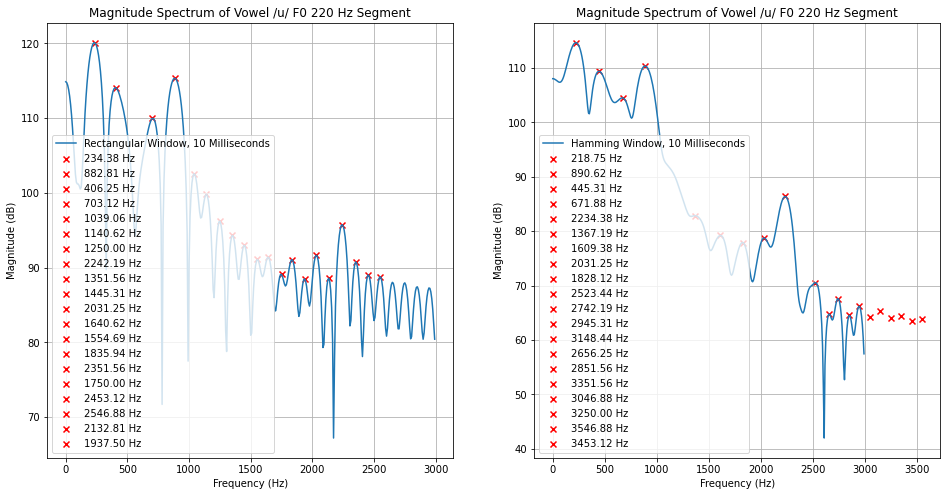

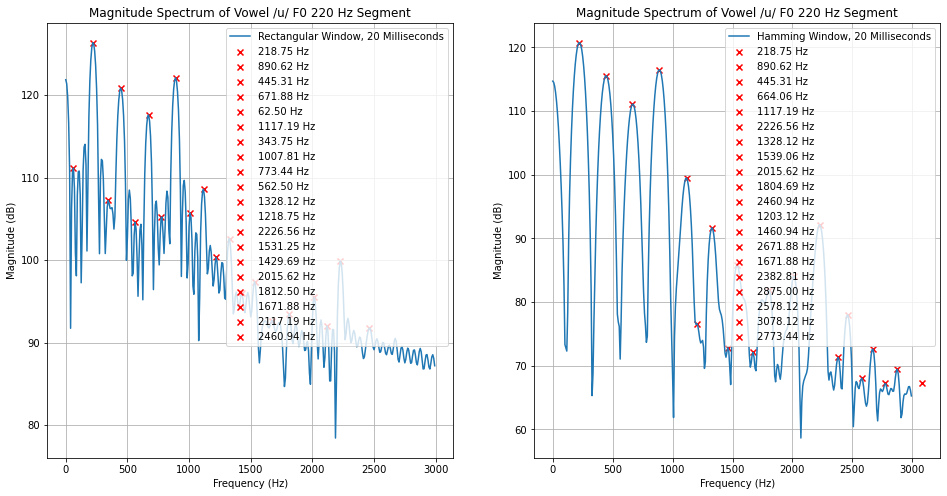

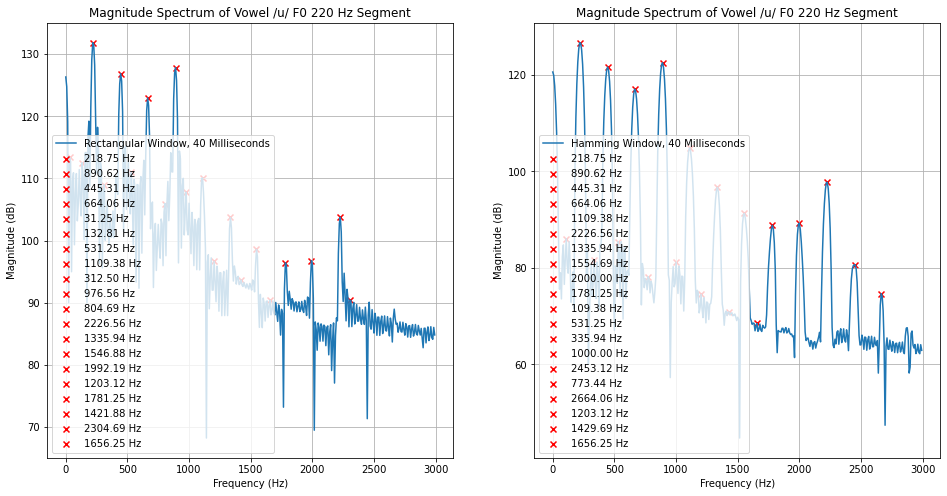

<Figure size 1152x576 with 0 Axes>

In [134]:
from scipy.signal import find_peaks

def estimate_parameters(spectrum_dB, threshold, min_distance, num_peaks):
    # Find peaks in the magnitude spectrum
    peaks, _ = find_peaks(spectrum_dB, height=threshold, distance=min_distance)

    # Sort the peaks by magnitude
    sorted_peaks = sorted(peaks, key=lambda p: -spectrum_dB[p])

    # Estimate parameters for the specified number of peaks
    estimated_frequencies = []
    for i in range(min(num_peaks, len(sorted_peaks))):
        frequency = sorted_peaks[i] * (8000 / len(spectrum_dB))
        estimated_frequencies.append(frequency)

    return estimated_frequencies

window_lengths_ms = [5, 10, 20, 40]  # in milliseconds


# Iterate over window lengths and window types (rectangular and Hamming)
for window_length_ms in window_lengths_ms:
    window_length = int((window_length_ms / 1000) * Fs)  # in samples
    
    segment_duration = window_length_ms/1000  #  same as window length
    segment_length = int(segment_duration * Fs)
    center_index = len(vowel_u_F0_120) // 2
    segment_start = center_index - segment_length // 2
    segment_end = segment_start + segment_length
    segment_u_F0_120 = vowel_u_F0_120[segment_start:segment_end]
    
    # Compute the DFT magnitude spectrum
    window_type = 'rectangular'
    spectrum_dB = compute_dft_magnitude(segment_u_F0_120, window_length, window_type)
    
    # Estimate parameters from the magnitude spectrum (get up to 4 peaks)
    threshold = 0  # Adjust this threshold for peak detection
    min_distance = 10  # Minimum distance between peaks in samples, adjust as needed
    num_peaks = 20  # Number of peaks to estimate (F0, F1, F2, F3)
    estimated_frequencies = estimate_parameters(spectrum_dB, threshold, min_distance, num_peaks)

    # Frequency axis (half of the DFT length)
    #freq_axis = np.arange(window_length // 2) * (Fs / window_length)
    freq_axis = np.arange((1024*3000)//8000) * (8000/1024)

    # Plot the magnitude spectrum
    plt.rcParams["figure.figsize"] = (16,8)
    plt.subplot(1,2,1)
    plt.plot(freq_axis, spectrum_dB[:(1024*3000)//8000], label=f'{window_type.capitalize()} Window, {window_length_ms} Milliseconds')
    for freq in estimated_frequencies:
        plt.scatter(freq, spectrum_dB[int(freq * 1024 / 8000)], c='red', marker='x', label=f'{freq:.2f} Hz')
    plt.title("Magnitude Spectrum of Vowel /u/ F0 120 Hz Segment")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.legend()
    
    window_type = 'hamming'
    spectrum_dB = compute_dft_magnitude(segment_u_F0_120, window_length, window_type)
    
    # Estimate parameters from the magnitude spectrum (get up to 4 peaks)
    threshold = 0  # Adjust this threshold for peak detection
    min_distance = 10  # Minimum distance between peaks in samples, adjust as needed
    num_peaks = 20  # Number of peaks to estimate (F0, F1, F2, F3)
    estimated_frequencies = estimate_parameters(spectrum_dB, threshold, min_distance, num_peaks)

    # Frequency axis (half of the DFT length)
    #freq_axis = np.arange(window_length // 2) * (Fs / window_length)
    freq_axis = np.arange((1024*3000)//8000) * (8000/1024)

    # Plot the magnitude spectrum
    plt.subplot(1,2,2)
    plt.plot(freq_axis, spectrum_dB[:(1024*3000)//8000], label=f'{window_type.capitalize()} Window, {window_length_ms} Milliseconds')
    for freq in estimated_frequencies:
        plt.scatter(freq, spectrum_dB[int(freq * 1024 / 8000)], c='red', marker='x', label=f'{freq:.2f} Hz')
    plt.title("Magnitude Spectrum of Vowel /u/ F0 120 Hz Segment")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.legend()
    plt.show()
    plt.tight_layout()
        
# Iterate over window lengths and window types (rectangular and Hamming)
for window_length_ms in window_lengths_ms:
    window_length = int((window_length_ms / 1000) * Fs)  # in samples
    
    segment_duration = window_length_ms/1000  #  same as window length
    segment_length = int(segment_duration * Fs)
    center_index = len(vowel_u_F0_220) // 2
    segment_start = center_index - segment_length // 2
    segment_end = segment_start + segment_length
    segment_u_F0_220 = vowel_u_F0_220[segment_start:segment_end]
    
    # Compute the DFT magnitude spectrum
    window_type = 'rectangular'
    spectrum_dB = compute_dft_magnitude(segment_u_F0_220, window_length, window_type)
    
    # Estimate parameters from the magnitude spectrum (get up to 4 peaks)
    threshold = 0  # Adjust this threshold for peak detection
    min_distance = 10  # Minimum distance between peaks in samples, adjust as needed
    num_peaks = 20  # Number of peaks to estimate (F0, F1, F2, F3)
    estimated_frequencies = estimate_parameters(spectrum_dB, threshold, min_distance, num_peaks)
    # Frequency axis (half of the DFT length)
    #freq_axis = np.arange(window_length // 2) * (Fs / window_length)
    freq_axis = np.arange((1024*3000)//8000) * (8000/1024)

    # Plot the magnitude spectrum
    plt.rcParams["figure.figsize"] = (16,8)
    plt.subplot(1,2,1)
    plt.plot(freq_axis, spectrum_dB[:(1024*3000)//8000], label=f'{window_type.capitalize()} Window, {window_length_ms} Milliseconds')
    for freq in estimated_frequencies:
        plt.scatter(freq, spectrum_dB[int(freq * 1024 / 8000)], c='red', marker='x', label=f'{freq:.2f} Hz')
    plt.title("Magnitude Spectrum of Vowel /u/ F0 220 Hz Segment")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.legend()
    
    window_type = 'hamming'
    spectrum_dB = compute_dft_magnitude(segment_u_F0_220, window_length, window_type)
    
    # Estimate parameters from the magnitude spectrum (get up to 4 peaks)
    threshold = 0  # Adjust this threshold for peak detection
    min_distance = 10  # Minimum distance between peaks in samples, adjust as needed
    num_peaks = 20  # Number of peaks to estimate (F0, F1, F2, F3)
    estimated_frequencies = estimate_parameters(spectrum_dB, threshold, min_distance, num_peaks)

    # Frequency axis (half of the DFT length)
    #freq_axis = np.arange(window_length // 2) * (Fs / window_length)
    freq_axis = np.arange((1024*3000)//8000) * (8000/1024)

    # Plot the magnitude spectrum
    plt.subplot(1,2,2)
    plt.plot(freq_axis, spectrum_dB[:(1024*3000)//8000], label=f'{window_type.capitalize()} Window, {window_length_ms} Milliseconds')
    for freq in estimated_frequencies:
        plt.scatter(freq, spectrum_dB[int(freq * 1024 / 8000)], c='red', marker='x', label=f'{freq:.2f} Hz')
    plt.title("Magnitude Spectrum of Vowel /u/ F0 220 Hz Segment")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.legend()
    plt.show()
    plt.tight_layout()


## Based on the peaks obtained from the DFT spectrum, we can visually determine the pitch and the formants of /u/. 

### 1) Ground Truth: F0 = 120Hz
### F1 = 300
### F2 = 870
### F3 = 2240

### 1a) Rectangular Window = 5ms
Observed     &nbsp;&nbsp; Error (Observed - Ground Truth)\
F0 = _       &nbsp;&nbsp; "Can't be determined due to only one waveform in window"\
F1 = 445    &nbsp;&nbsp;  145\
F2 = 828    &nbsp;&nbsp;  -41\
F3 = 2296    &nbsp;&nbsp; 56

### 1b) Hamming Window = 5ms
Observed     &nbsp;&nbsp; Error (Observed - Ground Truth)\
F0 = _      &nbsp;&nbsp;  "Can't be determined due to only one waveform in window"\
F1 = 468    &nbsp;&nbsp;  168.75\
F2 = 1445   &nbsp;&nbsp;  575.31\
F3 = 2492   &nbsp;&nbsp;  252.19

### 1c) Rectangular Window = 10ms
Observed    &nbsp;&nbsp;  Error (Observed - Ground Truth)\
F0 = 140    &nbsp;&nbsp;  20.63    \
F1 = 367    &nbsp;&nbsp;  67.17\
F2 = 828    &nbsp;&nbsp;  -42.88\
F3 = 2304    &nbsp;&nbsp; 64.69

### 1d) Hamming Window = 10ms
Observed    &nbsp;&nbsp;  Error (Observed - Ground Truth)\
F0 = 102    &nbsp;&nbsp;  -18    \
F1 = 390    &nbsp;&nbsp;  67 \
F2 = 812    &nbsp;&nbsp;  -58\
F3 = 2304   &nbsp;&nbsp;  64

### 1e) Rectangular Window = 20ms
Observed    &nbsp;&nbsp;  Error (Observed - Ground Truth)\
F0 = 125    &nbsp;&nbsp;  5    \
F1 = 359    &nbsp;&nbsp;  59 \
F2 = 843     &nbsp;&nbsp; -27\
F3 = 2296   &nbsp;&nbsp;  56

### 1f) Hamming Window = 20ms
Observed    &nbsp;&nbsp;  Error (Observed - Ground Truth)\
F0 = 118    &nbsp;&nbsp; -2\
F1 = 359    &nbsp;&nbsp;  59 \
F2 = 843    &nbsp;&nbsp;  -27\
F3 = 2289   &nbsp;&nbsp;  49

### 1g) Rectangular Window = 40ms
Observed     &nbsp;&nbsp; Error (Observed - Ground Truth)\
F0 = 125.00  &nbsp;&nbsp; 5.00   \
F1 = 359     &nbsp;&nbsp; 59\
F2 = 843     &nbsp;&nbsp; -27\
F3 = 2289    &nbsp;&nbsp; 49

### 1h) Hamming Window = 40ms
Observed     &nbsp;&nbsp; Error (Observed - Ground Truth)\
F0 = 117.19  &nbsp;&nbsp; -2.81    \
F1 = 359     &nbsp;&nbsp;&nbsp;&nbsp; 59\
F2 = 843     &nbsp;&nbsp; -27\
F3 = 2289   &nbsp;&nbsp;  49




### 2) Ground Truth: F0 = 220Hz
### F1 = 300
### F2 = 870
### F3 = 2240

### 2a) Rectangular Window = 5ms
Observed    &nbsp;&nbsp;  Error (Observed - Ground Truth)\
F0 = _      &nbsp;&nbsp;  "Can't be determined due to only one waveform in window"\
F1 = 500     &nbsp;&nbsp; 200\
F2 = 898     &nbsp;&nbsp; 58\
F3 = 2304    &nbsp;&nbsp; 54

### 2b) Hamming Window = 5ms
Observed    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Error (Observed - Ground Truth)\
F0 = _       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; "Can't be determined due to only one waveform in window"\
F1 = 546     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 246\
F2 = 898     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 58\
F3 = 2304    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 54

### 2c) Rectangular Window = 10ms
Observed     &nbsp;&nbsp;&nbsp;&nbsp; Error (Observed - Ground Truth)\
F0 = 234     &nbsp;&nbsp;&nbsp;&nbsp; 14    \
F1 = 406     &nbsp;&nbsp;&nbsp;&nbsp; 106\
F2 = 882     &nbsp;&nbsp;&nbsp;&nbsp; 42\
F3 = 2242.19 &nbsp;&nbsp;&nbsp;&nbsp; 2.19

### 2d) Hamming Window = 10ms
Observed    &nbsp;&nbsp;  Error (Observed - Ground Truth)\
F0 = 218.75 &nbsp;&nbsp;  -1.25    \
F1 = 445    &nbsp;&nbsp;  145 \
F2 = 890    &nbsp;&nbsp;  20\
F3 = 2234.38&nbsp;&nbsp;  -5.32

### 2e) Rectangular Window = 20ms
Observed     &nbsp;&nbsp;&nbsp;&nbsp; Error (Observed - Ground Truth)\
F0 = 218.75  &nbsp;&nbsp;&nbsp;&nbsp; -1.25    \
F1 = 343     &nbsp;&nbsp;&nbsp;&nbsp; 43 \
F2 = 890.62  &nbsp;&nbsp;&nbsp;&nbsp; 20.62\
F3 = 2226.56 &nbsp;&nbsp;&nbsp;&nbsp; 13.44

### 2f) Hamming Window = 20ms
Observed     &nbsp;&nbsp; Error (Observed - Ground Truth)\
F0 = 218.75  &nbsp;&nbsp; -1.25\
F1 = 445     &nbsp;&nbsp; 145\
F2 = 890.62  &nbsp;&nbsp; 20.62\
F3 = 2226.56 &nbsp;&nbsp; 13.44

### 2g) Rectangular Window = 40ms
Observed      &nbsp;&nbsp;Error (Observed - Ground Truth)\
F0 = 218.75  &nbsp;&nbsp; -1.25   \
F1 = 312.50   &nbsp;&nbsp;12.50\
F2 = 890.62 &nbsp;&nbsp;  20.62\
F3 = 2226.56 &nbsp;&nbsp; 13.44

### 2h) Hamming Window = 40ms
Observed     &nbsp;&nbsp; Error (Observed - Ground Truth)\
F0 = 218.75 &nbsp;&nbsp;  -1.25    \
F1 = 335    &nbsp;&nbsp;  59\
F2 = 843    &nbsp;&nbsp;  -27\
F3 = 2226.59&nbsp;&nbsp;  13.44